In [1]:

import warnings

#ignore by message
warnings.filterwarnings("ignore")
from numpy import loadtxt
from keras.models import load_model


Using TensorFlow backend.


In [2]:
# load model
model = load_model('model.h5')
# summarize model.
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1024)              803840    
_________________________________________________________________
batch_normalization_6 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_______________________________________

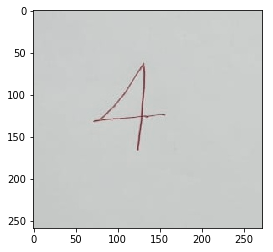

In [88]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the input image 
im_gray = cv2.imread('test//4.jpeg')
plt.imshow(im_gray)

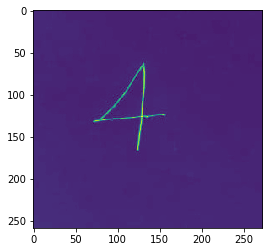

In [89]:
im_gray = cv2.cvtColor(im_gray,cv2.COLOR_BGR2GRAY)
im_gray=cv2.bitwise_not(im_gray)
plt.imshow(im_gray)

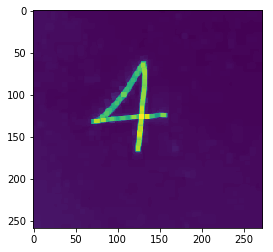

In [90]:
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(im_gray,kernel,iterations = 1)
plt.imshow(dilation)

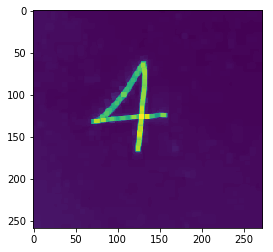

In [91]:
opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)

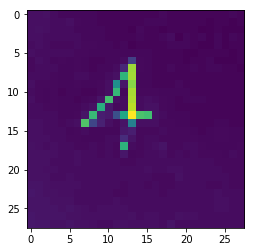

In [92]:
resized = cv2.resize(opening, (28, 28), cv2.INTER_LINEAR)
plt.imshow(resized)

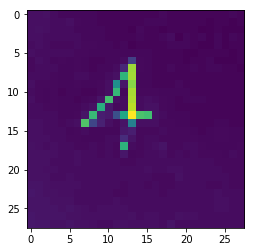

In [93]:
kernel = np.ones((1,1),np.uint8)
dilation = cv2.dilate(resized,kernel,iterations = 1)
plt.imshow(dilation)

In [94]:
dilation=np.where(dilation<60,0,255)


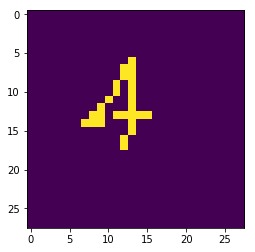

In [95]:
plt.imshow(dilation)

In [96]:
from sklearn import preprocessing
dilation=dilation.flatten()
print(dilation.shape)
dilation=preprocessing.normalize(dilation[:,np.newaxis], axis=0).ravel()

(784,)


In [97]:
dilation.shape

(784,)

In [98]:
print("The Predict value is :")
print(model.predict(np.array([dilation])).argmax())

The Predict value is :
4
